<a href="https://colab.research.google.com/github/KiarashMafi/FastAI-ImageRecognition/blob/main/bear_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from fastai.vision.all import *

In [28]:
path = Path("/content/drive/MyDrive/Colab Notebooks/Bear Detection/data")

In [36]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                  # grabs all images under data/
    splitter=RandomSplitter(0.2, seed=42),      # 80/20 train/valid split
    get_y=parent_label,                         # folder name = label
    item_tfms=Resize(256)
)

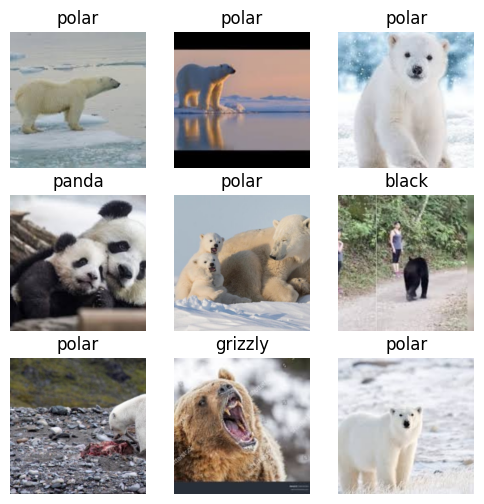

In [37]:
dls = dblock.dataloaders(path, bs=64)
dls.show_batch(max_n=9, figsize=(6,6))

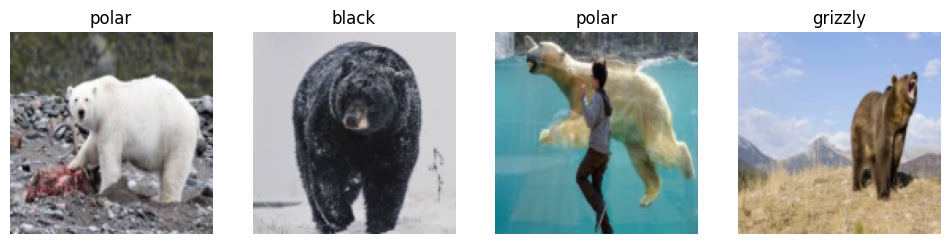

In [43]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dblock.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

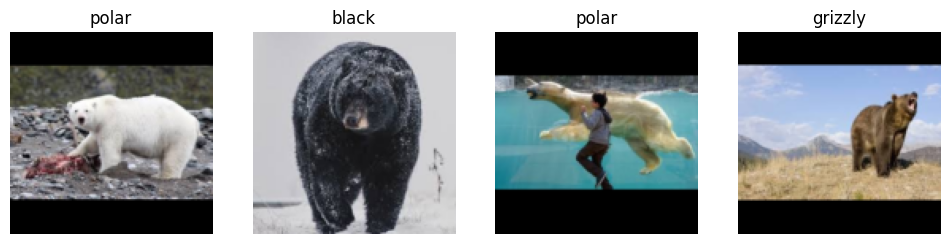

In [42]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode="zeros"))
dls = dblock.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

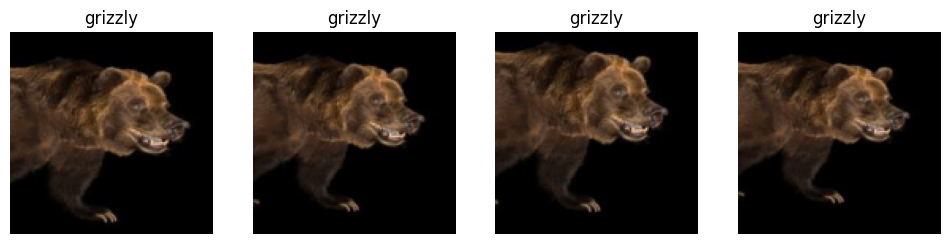

In [50]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.8))
dls = dblock.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

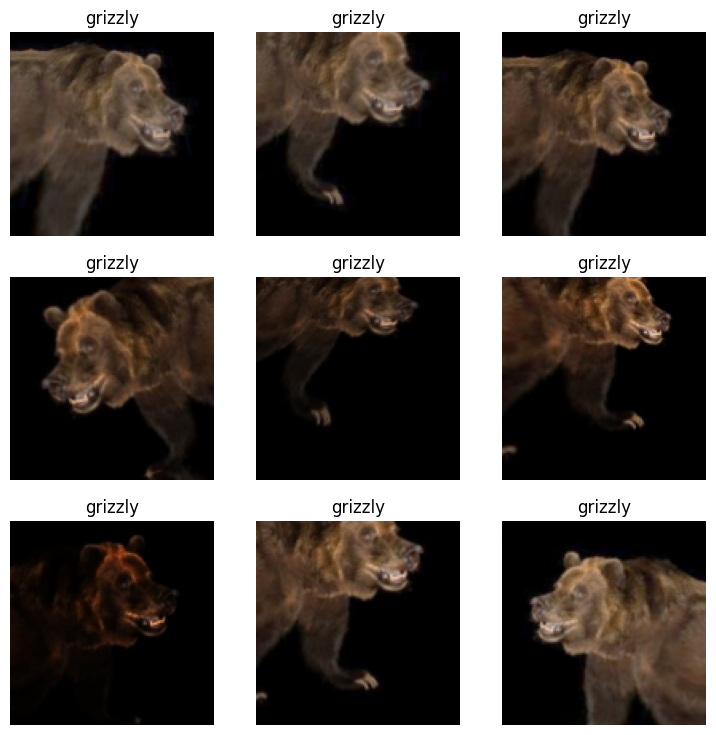

In [49]:
dblock = dblock.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = dblock.dataloaders(path)
dls.train.show_batch(max_n=9, nrows=3, unique=True)